#Introduction à l’apprentissage non supervisé


Dans les notebook précédents, nous avons appris à utiliser des modèles supervisés pour étudier si
certaines covariables sont utiles pour prédire un résultat observé. Nous avons ensuite cherché à améliorer notre modèle à l'aide de différentes techniques.
Dans ce notebook, nous passons de la prédiction à la recherche de modèles.

Ce que nous allons faire dans ce notebook :
1. Donner une introduction générale à l’apprentissage non supervisé.
2. Utiliser le clustering k-means comme technique d’apprentissage non supervisé.
3. Charger et explorer un jeu de données.
4. Trouver des clusters avec l’algorithme k-means.
5. Évaluer nos résultats avec la méthode Elbow.
6. Visualiser les données avec PCA

# Apprentissage non supervisé : Recherche de motifs dans les données

L'apprentissage non supervisé est le processus d'identification de patterns dans un ensemble de
données. L'identification de patterns est souvent une première étape dans la compréhension des
données. Les méthodes d'apprentissage non supervisé sont un ensemble de techniques conçues
pour **explorer** et trouver des “structures cachées” plutôt que de prédire un résultats.
L'apprentissage non supervisé ne nécessite pas de données étiquetées et s'applique donc à un plus
large éventail de données. En fait, la plupart des données dans le monde ne sont pas étiquetées.
Cependant, comme il n'y a pas d'étiquettes / de réponses correctes, il n'y a pas toujours de retour
d'information clair pour valider que les résultats sont corrects.
L'apprentissage non supervisé est également appelé Data Mining.
On peut procéder à deux types d'apprentissage non supervisé
1. Le clustering
2. La réudction de dimension


### Qu'est ce que le clustering

Le clustering consiste à regrouper vos données en sous-groupes (clusters) sur la base de covariables similaires. Ces sous-groupes sont ensuite utilisés pour une analyse ultérieure. Le clustering permet de comprendre intuitivement les différents segments naturels qui composent la population de vos données. Le clustering facilite généralement la visualisation de vos données.
Le clustering est aussi appelé cluster analysis, data segmentation, ou data partitioning.
Nous allons nous concentrer sur le clustering dans ce notebook.

### Qu’est-ce que la réduction des dimensions ?

La réduction de dimension vise à trouver un nombre réduit de covariables à utiliser pour construire un modèle significatif. Il existe de nombreuses raisons de réduire le nombre de caractéristiques
dans un ensemble de données, qu'il s'agisse d'éviter le surajustement ou d'accélérer le temps d'ajustement du modèle.
L'une des techniques de réduction de dimension les plus courantes est l'analyse en composantes principales (ACP).



# Données WGI

Pour appliquer les deux méthodes, nous allons réaliser une étude de cas, avec les données WGI.
Celles-ci donnent certains indicateurs sur la gouvernance des pays (plus d’infos sur cette [page](https://www.worldbank.org/en/publication/worldwide-governance-indicators#home)).
Voici donc le code pour les importer dans un data frame pandas, et leur aperçu. Pour information, plus la valeur est haute, meilleur est le pays sur cet indicateur (et inversement).

In [ ]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style("white")


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving wgi2019.csv to wgi2019 (1).csv


In [ ]:
WGI_complet  = pd.read_csv('wgi2019.csv')


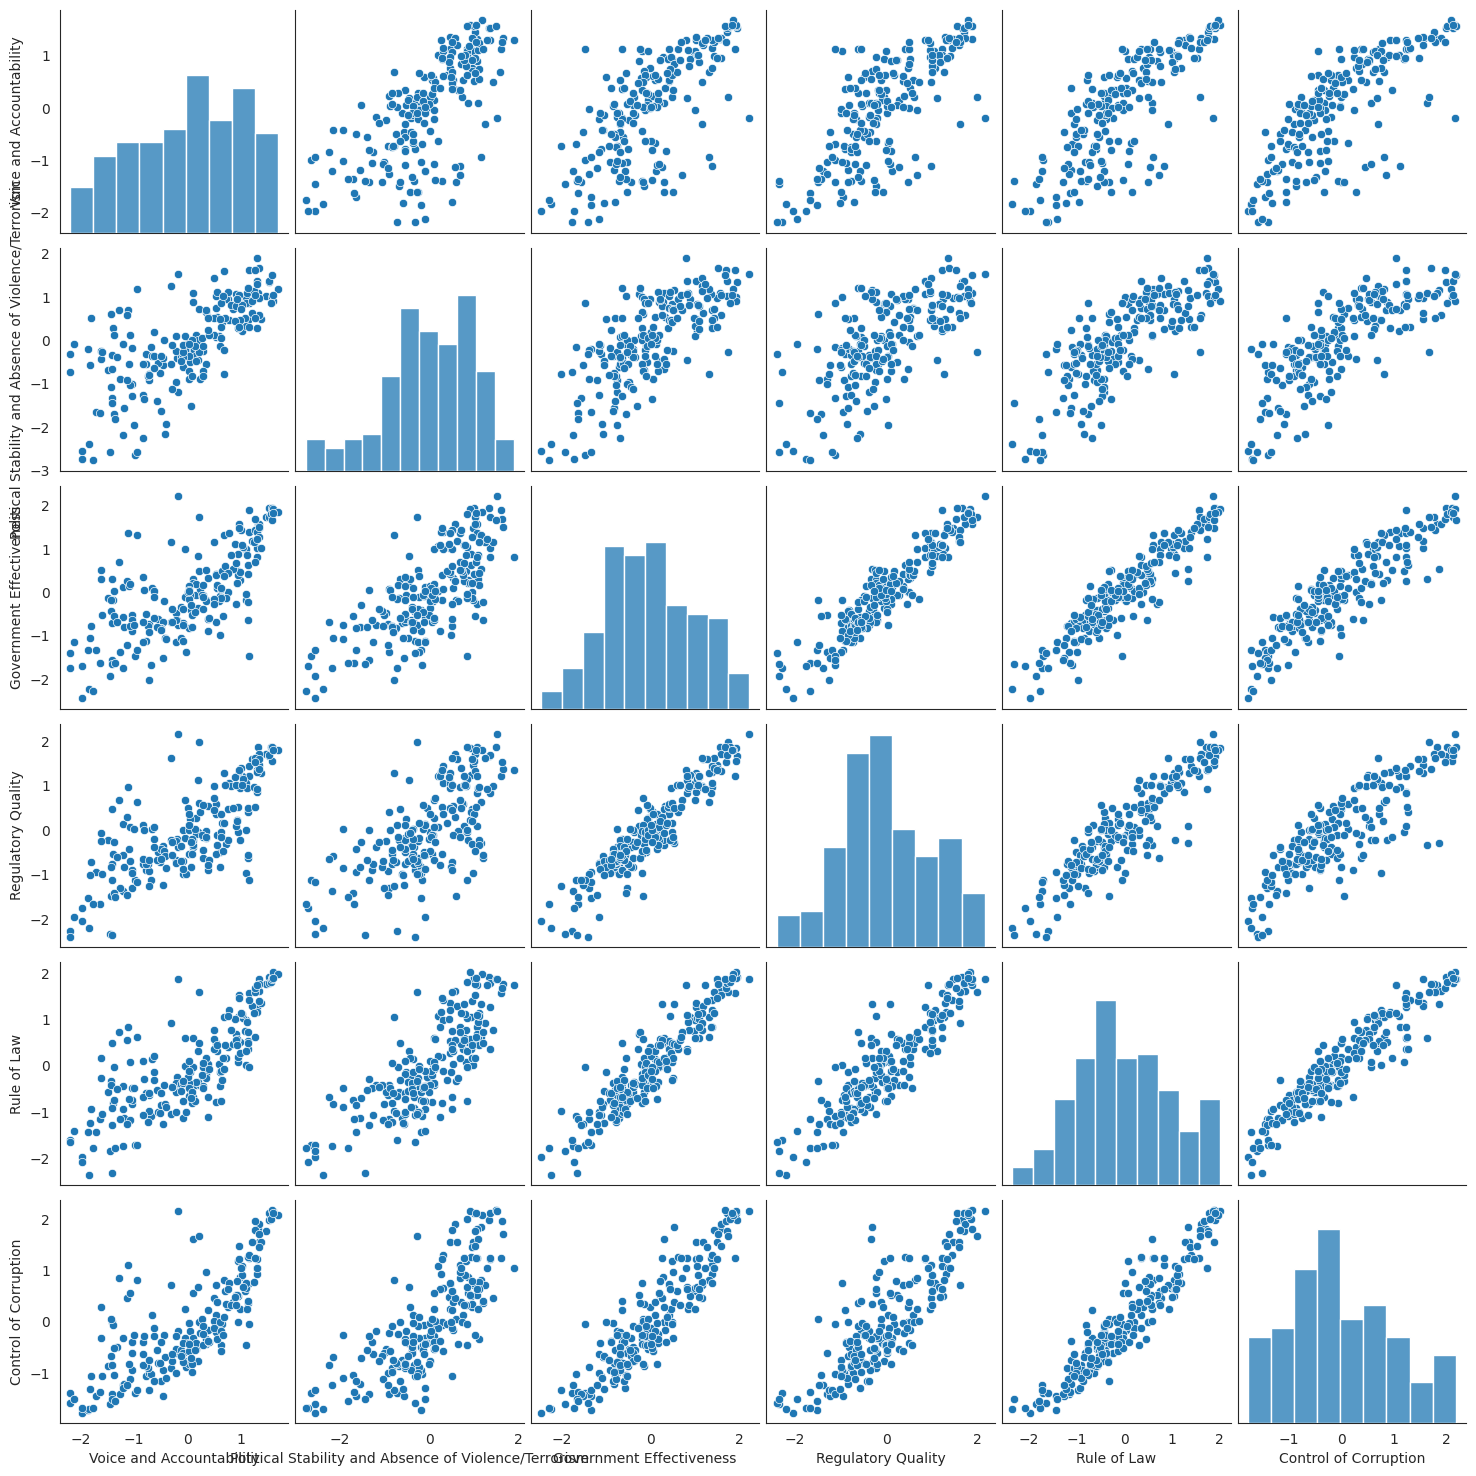

In [ ]:
import seaborn as sns
sns.pairplot(WGI_complet)

**Affichez les premiers lignes du dataset, un bref descriptif de vos données à l'aide de la fonction describe() et supprimer les pays pour lesquels il manque des information. Comparer en exécutant à nouveau la fonction describe()**

In [ ]:
WGI_complet.head()


,Country,Code,Voice and Accountability,Political Stability and Absence of Violence/Terrorism,Government Effectiveness,Regulatory Quality,Rule of Law,Control of Corruption
0,Aruba,ABW,1.29,1.36,1.03,0.86,1.26,1.22
1,Andorra,ADO,1.14,1.62,1.91,1.23,1.58,1.23
2,Afghanistan,AFG,-0.99,-2.65,-1.46,-1.12,-1.71,-1.40
3,Angola,AGO,-0.78,-0.31,-1.12,-0.89,-1.05,-1.05
4,Anguilla,AIA,NaN,1.37,0.82,0.85,0.36,1.23


In [ ]:
WGI_complet.describe()

,Voice and Accountability,Political Stability and Absence of Violence/Terrorism,Government Effectiveness,Regulatory Quality,Rule of Law,Control of Corruption
count,204.00,211.00,209.00,209.00,209.00,209.00
mean,0.00,0.00,-0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.19,-2.77,-2.45,-2.40,-2.35,-1.77
25%,-0.79,-0.55,-0.68,-0.69,-0.72,-0.76
50%,0.09,0.07,-0.07,-0.11,-0.12,-0.18
75%,0.90,0.84,0.71,0.85,0.69,0.70
max,1.69,1.90,2.22,2.16,2.02,2.17


In [ ]:
WGI_complet = WGI_complet.dropna()
WGI_complet

,Country,Code,Voice and Accountability,Political Stability and Absence of Violence/Terrorism,Government Effectiveness,Regulatory Quality,Rule of Law,Control of Corruption
0,Aruba,ABW,1.29,1.36,1.03,0.86,1.26,1.22
1,Andorra,ADO,1.14,1.62,1.91,1.23,1.58,1.23
2,Afghanistan,AFG,-0.99,-2.65,-1.46,-1.12,-1.71,-1.40
3,Angola,AGO,-0.78,-0.31,-1.12,-0.89,-1.05,-1.05
5,Albania,ALB,0.15,0.12,-0.06,0.27,-0.41,-0.53
...,...,...,...,...,...,...,...,...
209,Serbia,SRB,0.03,-0.09,0.02,0.11,-0.12,-0.45
210,South Africa,ZAF,0.67,-0.22,0.37,0.16,-0.08,0.08
211,"Congo, Dem. Rep.",ZAR,-1.37,-1.81,-1.63,-1.51,-1.79,-1.54
212,Zambia,ZMB,-0.29,-0.10,-0.68,-0.55,-0.46,-0.64


In [ ]:
#On peut supprimer la notation scientifique
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format

WGI_complet.describe()

,Voice and Accountability,Political Stability and Absence of Violence/Terrorism,Government Effectiveness,Regulatory Quality,Rule of Law,Control of Corruption
count,202.00,202.00,202.00,202.00,202.00,202.00
mean,-0.01,-0.04,-0.03,-0.03,-0.03,-0.04
std,1.00,1.00,1.00,1.00,1.00,0.99
min,-2.19,-2.77,-2.45,-2.40,-2.35,-1.77
25%,-0.81,-0.57,-0.71,-0.70,-0.75,-0.78
50%,0.08,0.01,-0.11,-0.16,-0.14,-0.21
75%,0.89,0.78,0.62,0.66,0.59,0.65
max,1.69,1.90,2.22,2.16,2.02,2.17


Il faut remettre à jour les indexe

In [ ]:
WGI_complet = WGI_complet.reset_index(drop=True)

In [ ]:
WGI_complet.head()

,Country,Code,Voice and Accountability,Political Stability and Absence of Violence/Terrorism,Government Effectiveness,Regulatory Quality,Rule of Law,Control of Corruption
0,Aruba,ABW,1.29,1.36,1.03,0.86,1.26,1.22
1,Andorra,ADO,1.14,1.62,1.91,1.23,1.58,1.23
2,Afghanistan,AFG,-0.99,-2.65,-1.46,-1.12,-1.71,-1.40
3,Angola,AGO,-0.78,-0.31,-1.12,-0.89,-1.05,-1.05
4,Albania,ALB,0.15,0.12,-0.06,0.27,-0.41,-0.53


Pour effectuer un clustering, outre quelques techniques particulières, il faut que les données soient **strictement numériques**.
Nous allons créer un nouveau dataframe basé sur les covariables numériques uniquement

In [ ]:
WGI_data = WGI_complet[["Voice and Accountability","Political Stability and Absence of Violence/Terrorism","Government Effectiveness","Regulatory Quality","Rule of Law","Control of Corruption"]]
WGI_data.head()

,Voice and Accountability,Political Stability and Absence of Violence/Terrorism,Government Effectiveness,Regulatory Quality,Rule of Law,Control of Corruption
0,1.29,1.36,1.03,0.86,1.26,1.22
1,1.14,1.62,1.91,1.23,1.58,1.23
2,-0.99,-2.65,-1.46,-1.12,-1.71,-1.40
3,-0.78,-0.31,-1.12,-0.89,-1.05,-1.05
4,0.15,0.12,-0.06,0.27,-0.41,-0.53


# Classification Ascendante Hiérarchique
La méthode CHA suppose qu'on dispose d'une mesure de dissimilarité entre les individus, dans le cas de points situés dans un espace L2, on peut utiliser la distance comme mesure de dissimilarité.
La classification ascendante hiérarchique est dite ascendante car elle part d'une situation où tous les individus sont seuls dans une classe, puis sont rassemblés en classes de plus en plus grandes.
Le qualificatif hiérarchique vient du fait qu'elle produit une hiérarchie H à l'ensemble des classes
à toutes les étapes de l'algorithme. Dans ce TD nous utilisons la méthode de Ward pour séparer des individus en classes. La méthode de Ward propose qu'à chaque pas, on cherche à obtenir un minimum local de l'inertie intraclasse ou un maximum de l'inertie interclasse. En d'autres termes, elle consiste à réunir les deux clusters dont le regroupement fera le moins baisser l’inertie
interclasse. On suppose tout de même l’existence de distances euclidiennes entre observations.
Cette technique tend à regrouper les petites classes entre elles.
Comment faire une classification ascendante hiérarchique?
1. On calcule la distance entre chaque groupe. Plusieurs distances peuvent être utilisées, la distance Euclidienne que vous connaissez bien, ou encore la distance maximale qui est la distance des deux éléments les plus éloignés (de groupe distincts)
2. On fusionne les 2 groupes les plus proches et on les relie dans le dendrogramme (là encore, le choix de la méthode de fusion vous appartient). Le trait qui nous permet de relier les 2 groupes dans le dendrogramme est d'autant plus long que la distance entre les groupes est élevée.
3. On répète l'étape 1 et 2 jusqu'à ce qu'il ne reste plus qu'un seul et unique groupe réunissant tous les individus.

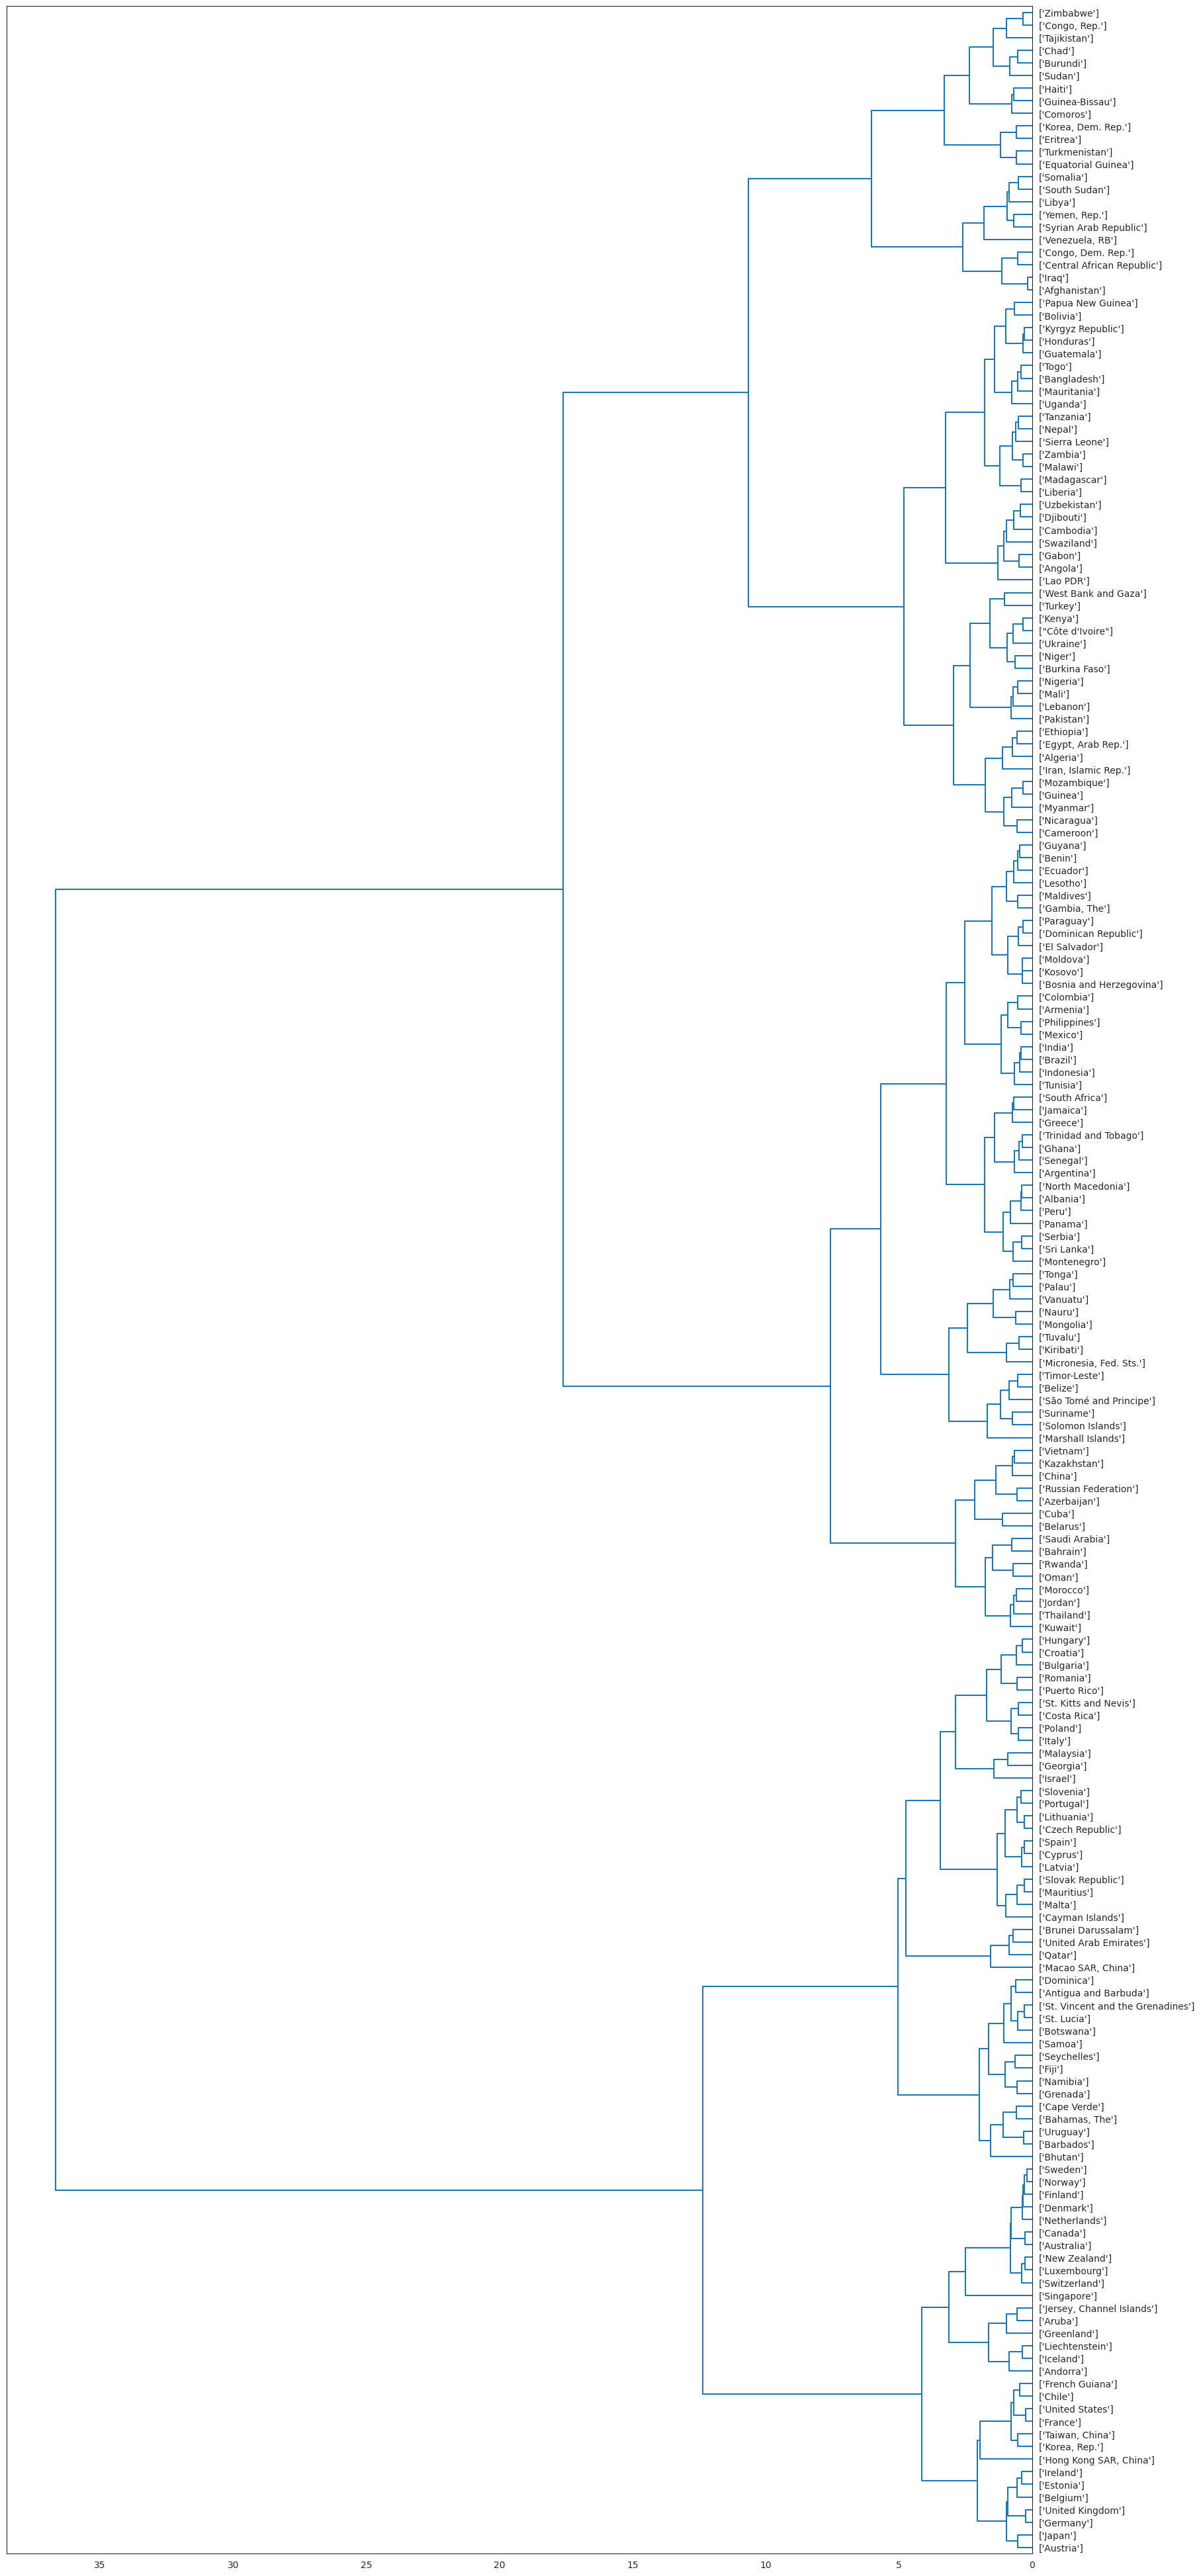

In [ ]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import cdist
import numpy as np
from pylab import rcParams
rcParams['figure.figsize'] =20, 50
#generate the linkage matrix – Ward method
Z = linkage(WGI_data,method='ward',metric='euclidean')
#plotting the dendrogram
dendrogram(Z,labels=np.array(WGI_complet[["Country"]]),orientation='left',color_threshold=0,leaf_font_size=10)
plt.show()

On fixe k=30, donner les pays 'voisins' de la France au niveau de l'arbre.

In [ ]:
WGI_complet.index[WGI_complet['Country'] == 'France'].tolist()

#les pays voisins de la france sont US dans la meme classe et  french guinea et chile dans la classe au dessus

[60]

In [ ]:
#On vérifie qu'on a la bonne correspondance
print(WGI_complet.loc[60])
print(WGI_data.loc[60])

Country                                                  France
Code                                                        FRA
Voice and Accountability                                   1.14
Political Stability and Absence of Violence/Terrorism      0.31
Government Effectiveness                                   1.38
Regulatory Quality                                         1.44
Rule of Law                                                1.41
Control of Corruption                                      1.30
Name: 60, dtype: object
Voice and Accountability                                1.14
Political Stability and Absence of Violence/Terrorism   0.31
Government Effectiveness                                1.38
Regulatory Quality                                      1.44
Rule of Law                                             1.41
Control of Corruption                                   1.30
Name: 60, dtype: float64


In [ ]:
def CHA_parameter_frenche(method,metric):
  Z = linkage(WGI_data,method=method,metric=metric)
  # Spécifier le nombre de clusters que vous souhaitez obtenir
  k = 30
  # Assigner chaque point à un cluster en utilisant la méthode de coupure
  clusters = fcluster(Z, k, criterion='maxclust')
  # Indice du point de données dont vous voulez trouver les voisins
  indice_point_a_trouver = 60
  # Filtrer les indices des points appartenant au même cluster que le point spécifié
  indices_du_meme_cluster =  np.where(clusters == clusters[indice_point_a_trouver])
  # On récupère les pays dans le même cluster
  countries_values = WGI_complet.loc[indices_du_meme_cluster, 'Country'].tolist()
  print(countries_values)

cf doc
The distance metric to use. The distance function can be ‘braycurtis’, ‘canberra’, ‘chebyshev’, ‘cityblock’, ‘correlation’, ‘cosine’, ‘dice’, ‘euclidean’, ‘hamming’, ‘jaccard’, ‘jensenshannon’, ‘kulczynski1’, ‘mahalanobis’, ‘matching’, ‘minkowski’, ‘rogerstanimoto’, ‘russellrao’, ‘seuclidean’, ‘sokalmichener’, ‘sokalsneath’, ‘sqeuclidean’, ‘yule’.

method=’single’,’complete’ ,’average’ ,’weighted’ ,’centroid’ ,’median’, ’ward’


Ne pas utiliser Ward avec autre chose que euclidien

In [ ]:
CHA_parameter_frenche(method='ward',metric='euclidean')

['Chile', 'France', 'French Guiana', 'Hong Kong SAR, China', 'Korea, Rep.', 'Taiwan, China', 'United States']


**Lister dans un tableau le pays voisin de la France selon toutes les méthodes (en utilisant la distance euclidienne) et tester deux autres metriques**

In [ ]:
#TODO
for k in ['single','complete','average','weighted','centroid','median','ward']:
  CHA_parameter_frenche(method=k ,metric='euclidean')




['Aruba', 'Andorra', 'Angola', 'Albania', 'Argentina', 'Armenia', 'Antigua and Barbuda', 'Australia', 'Austria', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahamas, The', 'Bosnia and Herzegovina', 'Belize', 'Bolivia', 'Brazil', 'Barbados', 'Botswana', 'Canada', 'Switzerland', 'Chile', "Côte d'Ivoire", 'Cameroon', 'Colombia', 'Comoros', 'Cape Verde', 'Costa Rica', 'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt, Arab Rep.', 'Spain', 'Estonia', 'Ethiopia', 'Finland', 'Fiji', 'France', 'Gabon', 'United Kingdom', 'Ghana', 'Guinea', 'Gambia, The', 'Guinea-Bissau', 'Greece', 'Grenada', 'Guatemala', 'French Guiana', 'Guyana', 'Honduras', 'Croatia', 'Haiti', 'Hungary', 'Indonesia', 'India', 'Ireland', 'Iceland', 'Italy', 'Jamaica', 'Jordan', 'Japan', 'Kenya', 'Kyrgyz Republic', 'Cambodia', 'St. Kitts and Nevis', 'Korea, Rep.', 'Kuwait', 'Liberia', 'St. Lucia', 'Liechtenstein', 'Sri Lanka', 'Lesotho

In [ ]:
for k in ['single','complete','average','weighted']:
  CHA_parameter_frenche(method=k ,metric='correlation')


['Aruba', 'Afghanistan', 'Angola', 'Albania', 'United Arab Emirates', 'Argentina', 'Armenia', 'Antigua and Barbuda', 'Australia', 'Azerbaijan', 'Belgium', 'Benin', 'Burkina Faso', 'Bulgaria', 'Bahrain', 'Bahamas, The', 'Belarus', 'Belize', 'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam', 'South Sudan', 'Botswana', 'Central African Republic', 'Canada', 'Switzerland', 'Chile', 'China', "Côte d'Ivoire", 'Cameroon', 'Congo, Rep.', 'Colombia', 'Comoros', 'Cape Verde', 'Cuba', 'Cayman Islands', 'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.', 'Eritrea', 'Spain', 'Estonia', 'Ethiopia', 'Finland', 'Fiji', 'France', 'Micronesia, Fed. Sts.', 'Gabon', 'United Kingdom', 'Georgia', 'Ghana', 'Guinea', 'Gambia, The', 'Guinea-Bissau', 'Equatorial Guinea', 'Greece', 'Grenada', 'Greenland', 'Guatemala', 'French Guiana', 'Guyana', 'Hong Kong SAR, China', 'Honduras', 'Croatia', 'Haiti', 'Hungary', 'Indonesia', 'India', 'Ire

### Introduction au clustering K-means
K-means est l’une des techniques de clustering les plus courantes. Le but de cette technique est de trouver un groupe de points de données proches les uns des autres (un cluster) et éloignés des autres points de données (les autres clusters).
Comment faire un clustering k-means? Au départ, les points de données sont attribués aléatoirement à un cluster. Ensuite, on calcule le centre de chaque cluster. Ensuite, on alterne entre deux étapes :
1. Étape d'assignation : Les observations sont assignées à un cluster dont le centre est le plus
proche d'elles.
2. Étape de mise à jour : Les nouveaux points centraux des clusters sont déterminés.

Le processus se répète jusqu'à ce que les observations ne soient plus réaffectées à différents clusters et que le centre de chaque cluster ne bouge plus.
En d'autres termes, les observations sont constamment réaffectées aux clusters jusqu'à ce que la distance entre une observation et son point central le plus proche soit minimisée

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import random

random.seed(10)

Lorsque vous effectuez une analyse de clustering avec l'algorithme k-means, il est courant d'observer l'inertie pour évaluer la qualité du regroupement obtenu. L'inertie, également appelée somme des carrés intra-cluster, mesure la dispersion des points à l'intérieur de chaque cluster. Plus précisément, l'inertie d'un cluster est la somme des carrés des distances entre chaque point du cluster et le centre du cluster.

La méthode du coude (Elbow Method) est une technique couramment utilisée pour déterminer le nombre optimal de clusters dans un ensemble de données lors de l'utilisation de l'algorithme k-means. L'idée sous-jacente est d'analyser la variation de l'inertie (somme des carrés intra-cluster) en fonction du nombre de clusters (k) et d'identifier un point où l'ajout de clusters supplémentaires n'entraîne pas une réduction significative de l'inertie. Ce point est souvent appelé le "coude" dans le graphique.

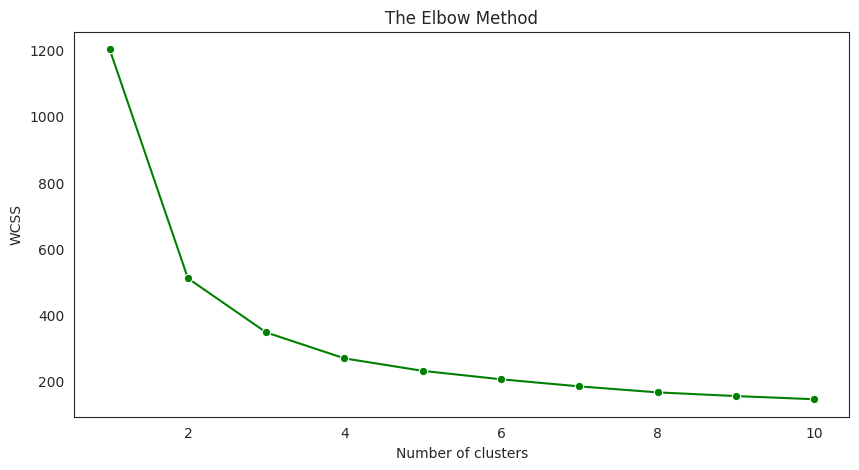

In [ ]:
# Pour sauvgarder l'inertie  (Within-Cluster Sum of Square)
wcss = []

# boucle
for i in range(1, 11):
    # k-mean cluster model pour differente k values
    kmeans = KMeans(n_clusters=i, random_state=0,n_init=10)
    kmeans.fit(WGI_data)
    # inertia method revoi la wcss du model
    wcss.append(kmeans.inertia_)

#  DataFrame pour l'affichage
df_wcss = pd.DataFrame({'Number of Clusters': range(1, 11), 'WCSS': wcss})

# figure size
plt.figure(figsize=(10, 5))
sns.lineplot(x='Number of Clusters', y='WCSS', data=df_wcss, marker='o', color='green')
# labeling
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


A quoi sert le paramètre n_init ?

n_init est le nombre de cluster qu'on doit faire

**Proposer un nombre de cluster en fonction du graphique**

3

Observons les clusters et ajoutons les aux données

In [ ]:
#Cluster K-means
model=KMeans(n_clusters=5,random_state = 0,n_init=10)
#adapter le modèle de données
model.fit(WGI_data)
res_label = model.labels_
res_label

array([2, 2, 1, 3, 4, 0, 4, 4, 0, 2, 2, 3, 1, 2, 4, 3, 3, 0, 4, 0, 4, 4,
       4, 3, 4, 0, 0, 0, 1, 0, 1, 2, 2, 2, 4, 3, 3, 3, 4, 3, 0, 0, 4, 0,
       0, 2, 2, 3, 0, 2, 4, 3, 4, 3, 1, 2, 2, 3, 2, 0, 2, 0, 3, 2, 0, 4,
       3, 4, 3, 1, 0, 0, 2, 3, 2, 4, 2, 3, 0, 3, 0, 4, 4, 2, 3, 1, 2, 2,
       0, 0, 4, 2, 4, 3, 3, 3, 0, 0, 2, 4, 3, 3, 3, 1, 0, 2, 4, 4, 2, 2,
       2, 4, 2, 4, 4, 3, 4, 4, 4, 4, 3, 0, 3, 4, 4, 3, 3, 0, 4, 0, 0, 3,
       3, 3, 2, 2, 3, 4, 2, 0, 3, 4, 0, 4, 4, 3, 0, 0, 1, 2, 4, 0, 0, 3,
       4, 0, 4, 1, 4, 2, 4, 3, 4, 1, 4, 4, 0, 2, 2, 3, 0, 1, 1, 3, 4, 3,
       1, 4, 0, 4, 4, 4, 0, 2, 3, 3, 3, 0, 2, 3, 0, 1, 4, 0, 3, 2, 1, 4,
       4, 1, 4, 3], dtype=int32)

In [ ]:
#On ajoute une colonne qui contiendra le cluster choisi par kmeans
WGI_complet.insert(0, "kmeansClass", model.labels_, True)

Ajoutons également le partitionnement obtenu avec votre dernière CHA (on fixera le même nombre de classe)

In [ ]:
#On ajoute une colonne qui contiendra le cluster choisi par CHA
from scipy.cluster.hierarchy import fcluster
model.labels_ = fcluster(Z, 5,criterion='maxclust')

In [ ]:
WGI_complet.insert(0, "CHAClass", model.labels_, True)
WGI_data.head()

,Voice and Accountability,Political Stability and Absence of Violence/Terrorism,Government Effectiveness,Regulatory Quality,Rule of Law,Control of Corruption
0,1.29,1.36,1.03,0.86,1.26,1.22
1,1.14,1.62,1.91,1.23,1.58,1.23
2,-0.99,-2.65,-1.46,-1.12,-1.71,-1.40
3,-0.78,-0.31,-1.12,-0.89,-1.05,-1.05
4,0.15,0.12,-0.06,0.27,-0.41,-0.53


Il est possible (et même recommandé !) de comparer les correspondances entre Kmeans et la CHA dans un tableau de contingence

In [ ]:
contingency_matrix = pd.crosstab(WGI_complet['kmeansClass'],WGI_complet['CHAClass'])
print(contingency_matrix)

CHAClass      1   2   3   4   5
kmeansClass                    
0             0  34   9   0   0
1             0   0   0   0  17
2            31   8   0   0   0
3             0   0   2  40   6
4             0   0  52   3   0


**Comparer le clustering de Kmans avec votre CHA**

**Tester Kmeans avec d'autres paramétrages (cf [ici](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) )**

# L'ACP

L'Analyse en Composantes Principales (ACP) est une technique permettant de réduire la dimensionnalité des données tout en préservant autant que possible leur structure d'origine. Elle est utilisée pour


*   explorer et visualiser des données complexes.  l'ACP facilite la visualisation des données dans des graphiques en deux ou trois dimensions. Cela peut aider à détecter des tendances, des clusters ou des structures sous-jacentes qui seraient difficiles à percevoir dans l'espace d'origine.

*   diminuer la taille des données en réduisant la dimension (utile pour la compréssion), grâche à la réduction du nombre de covariable
*   éliminer les corrélations. Les composantes principales sont non corrélées, ce qui peut être utile lorsque les variables d'origine sont fortement corrélées. Cela simplifie l'interprétation des relations entre les variables.

 L'ACP permet de transformer un ensemble de variables corrélées en un ensemble de variables non corrélées, appelées composantes principales. Ces composantes capturent l'essentiel de la variance des données, ce qui permet de réduire la dimensionnalité sans perdre trop d'information. L'ACP est parfois utilisée comme étape de prétraitement avant l'application de modèles statistiques ou d'apprentissage automatique. En réduisant le nombre de variables, elle peut améliorer la performance de certains modèles et accélérer les calculs.

Dans le sous-module decomposition, nous allons importer la fonction PCA(). Le fonctionnement
de celle-ci est similaire à toutes les autres dans scikit-learn.
1. On créé d’abord un objet (nommé ici pca) qui va contenir le résultat de l’ACP. Dans la fonc-
tion PCA(), on pourra aussi indiquer les paramètres tels que le nombre de composants à
retenir (n_components - ici on garde tout).
2. Ensuite, on ajuste (fit en anglais) sur des données avec la fonction fit() de l’objet précédem-
ment créé. Dans cette fonction, nous devons donc passer les données à utiliser (variables
uniquement quantitatives).
Si l’on souhaite une ACP normée (ce qui n’est pas le cas ici), il nous faut standardiser les données
en amont, avec par exemple la fonction scale() du sous-module preprocessing (importée aussi ici).
Bien évidemment, il ne faut passer que des variables quantitatives, sans données manquante

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
pca = PCA()
pca.fit(WGI_complet[["Voice and Accountability","Political Stability and Absence of Violence/Terrorism","Government Effectiveness","Regulatory Quality","Rule of Law","Control of Corruption"]])

PCA()

## Variance expliquée
L'objet pca comprend maintenant un certain nombre d’objets et de fonctions. Le premier ob-
jet est le tableau des variances expliquées (explained_variance_ - proportionnelles aux valeurs
propres) par chaque dimension, et le ratio (proportion) de variance expliquée par dimension (ex-
plained_variance_ratio_).

In [ ]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[5.04959218 0.41467898 0.30759716 0.12165034 0.04965011 0.04069217]
[0.84386857 0.06929957 0.05140446 0.02032974 0.00829734 0.00680032]


In [ ]:
eig = pd.DataFrame(
{
"Dimension" : ["Dim" + str(x + 1) for x in range(6)],
"Variance expliquée" : pca.explained_variance_,
"% variance expliquée" : numpy.round(pca.explained_variance_ratio_ *100),
"% cum. var. expliquée" : numpy.round(numpy.cumsum(pca.explained_variance_ratio_) * 100)
}
)
eig

,Dimension,Variance expliquée,% variance expliquée,% cum. var. expliquée
0,Dim1,5.05,84.00,84.00
1,Dim2,0.41,7.00,91.00
2,Dim3,0.31,5.00,96.00
3,Dim4,0.12,2.00,98.00
4,Dim5,0.05,1.00,99.00
5,Dim6,0.04,1.00,100.00


**Quel pourcentage de la variance est expliquée avec trois dimensions ?**

On va maintenant représenter graphiquement ces proportions de variances expliquées (qu'on passe en pourcentage par convenance).

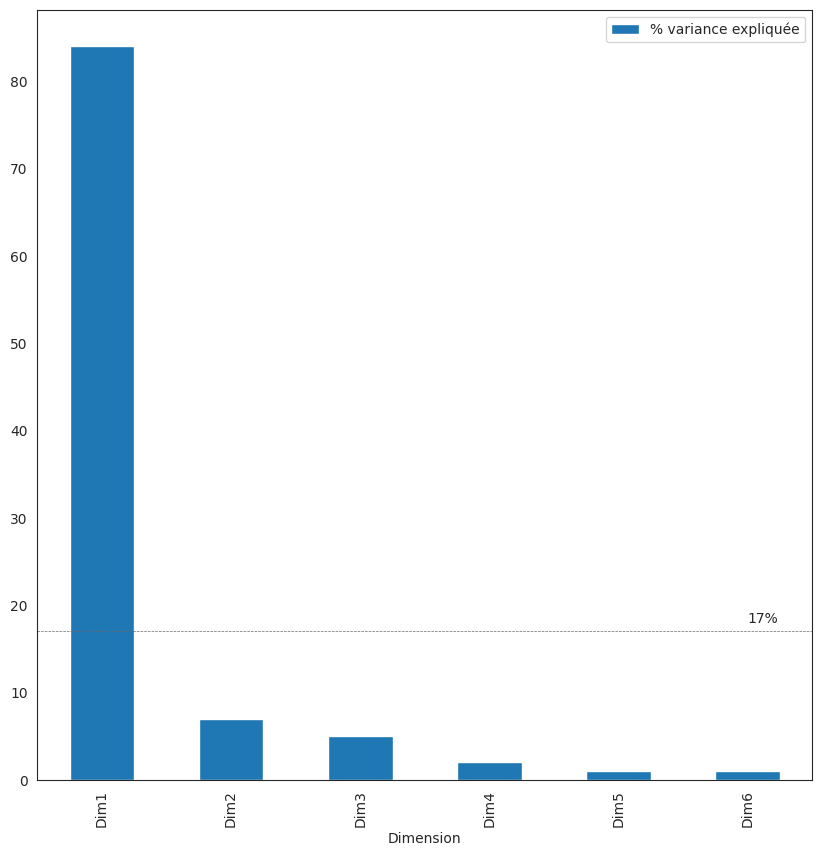

In [ ]:
rcParams['figure.figsize'] =10, 10
eig.plot.bar(x = "Dimension", y = "% variance expliquée") # permet un diagramme en barres
plt.text(5, 18, "17%") # ajout de texte
plt.axhline(y = 17, linewidth = .5, color = "dimgray", linestyle = "--") # ligne 17 = 100 / 6 (nb dimensions)
plt.show()

**On fixe le seuil à 90 % de la variance des données, combien d'axe faut-il séléctionner ?**

# Représentation des individus
Nous allons maintenant calculer les coordonnées des iris sur les dimensions, avec la fonction
transform() de l'objet pca

In [ ]:
WGI_pca = pca.transform(WGI_complet[["Voice and Accountability","Political Stability and Absence of Violence/Terrorism","Government Effectiveness","Regulatory Quality","Rule of Law","Control of Corruption"]])

Afin de manipuler plus facilement l’objet obtenu par la suite, nous allons ajouter à notre dataFrame les deux premières dimensions de l'ACP.

In [ ]:
WGI_pca.shape

(202, 6)

In [ ]:
WGI_complet.insert(0, "pca_dim1", WGI_pca[:,0], True)
WGI_complet.insert(0, "pca_dim2", WGI_pca[:,1], True)

In [ ]:
WGI_complet.head()

,pca_dim2,pca_dim1,CHAClass,kmeansClass,Country,Code,Voice and Accountability,Political Stability and Absence of Violence/Terrorism,Government Effectiveness,Regulatory Quality,Rule of Law,Control of Corruption
0,0.50,-2.92,1,2,Aruba,ABW,1.29,1.36,1.03,0.86,1.26,1.22
1,0.08,-3.63,1,2,Andorra,ADO,1.14,1.62,1.91,1.23,1.58,1.23
2,-0.85,3.70,5,1,Afghanistan,AFG,-0.99,-2.65,-1.46,-1.12,-1.71,-1.40
3,0.45,2.08,4,3,Angola,AGO,-0.78,-0.31,-1.12,-0.89,-1.05,-1.05
4,0.18,0.14,3,4,Albania,ALB,0.15,0.12,-0.06,0.27,-0.41,-0.53


In [ ]:
from google.colab import files
#Countries-Continents.csv
uploaded = files.upload()

Saving wgi2019.csv to wgi2019 (2).csv


In [ ]:
WGI_continent = pd.read_csv("Countries-Continents.csv")
WGI_continent

In [ ]:
WGI_continent.shape

In [ ]:
inner_merged = pd.merge(WGI_continent, WGI_complet)
inner_merged

In [ ]:
WGI_complet[~WGI_complet.Country.isin(WGI_continent.Country)].Country

In [ ]:
WGI_complet[~WGI_complet.Country.isin(WGI_continent.Country)].shape

In [ ]:
# Transformation en DataFrame pandas
WGI_pca_df = pd.DataFrame({
"Dim1" : inner_merged["pca_dim1"],
"Dim2" : inner_merged["pca_dim2"],
"Country" : inner_merged["Country"],
"Continent" : inner_merged["Continent"]
})
# Résultat (premières lignes)
WGI_pca_df.head()

Affichage des données sur les deux dimensions

In [ ]:
WGI_pca_df.plot.scatter("Dim1", "Dim2") # nuage de points
plt.xlabel("Dimension 1 (83%)") # modification du nom de l'axe X
plt.ylabel("Dimension 2 (8 %)") # idem pour axe Y
plt.suptitle("Premier plan factoriel (91%)") # titre général
plt.show()

Affichons les pays aux extrémités

In [ ]:
# utilisation de subplots nécessaire car annotation du graphique
fig, ax = plt.subplots()
WGI_pca_df.plot.scatter("Dim1", "Dim2", ax = ax) # l'option ax permet de placer les points et le texte sur le même graphique
# boucle sur chaque pays
for k in WGI_pca_df.iterrows():
  # annotation uniquement si valeur absolue sur une de 2 dimension
  if (abs(k[1]['Dim1']) > 3.5) | (abs(k[1]['Dim2']) > 1.5):
    ax.annotate(k[1]["Country"], (k[1]['Dim1'], k[1]['Dim2']), fontsize = 9)

plt.xlabel("Dimension 1 (83%)")
plt.ylabel("Dimension 2 (8 %)")
plt.suptitle("Premier plan factoriel (91%)")
plt.show()

**Afficher les pays aux extrémités et les comparer**

On pourrait aussi se demander s’il y a un effet continent. Pour cela, nous allons colorer les points en fonction de leur continent

In [ ]:
# permet de créer une palette de couleurs, basée sur Color Brewer
palette = plt.get_cmap("Dark2")
# associe une couleur à chaque continent (cf ci-dessous)
couleurs = dict(zip(WGI_pca_df["Continent"].drop_duplicates(),palette(range(6))))
couleurs

Une fois qu'on a associé une couleur à chaque continent, on peut utiliser ce dictionnaire comme ci-dessous

In [ ]:
position = dict(zip(couleurs.keys(), range(6)))
position

In [ ]:
# Affichage des points avec une liste de couleurs
WGI_pca_df.plot.scatter(x = "Dim1", y = "Dim2", c = [couleurs[p] for p in WGI_pca_df["Continent"]])
# boucle pour afficher la légende
for cont, coul in couleurs.items():
  plt.scatter(3, position[cont] / 3 + 2.15, c = [coul], s = 20)
  plt.text(3.2, position[cont] / 3 + 2, cont)
plt.xlabel("Dimension 1 (83%)")
plt.ylabel("Dimension 2 (8 %)")
plt.suptitle("Premier plan factoriel (91%)")
plt.show()

Regardons par continents

In [ ]:
fig = plt.figure()
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)
for cont, coul in couleurs.items():
  ax = fig.add_subplot(2, 3, position[cont] + 1)
  temp = WGI_pca_df.query('Continent == "' + cont + '"')
  temp.plot.scatter(x = "Dim1", y = "Dim2", c = [coul], ax = ax)
  ax.set_title(cont)
  ax.set_xlim(WGI_pca_df.Dim1.quantile([0, 1])) # permet d'avoir min et max
  ax.set_ylim(WGI_pca_df.Dim2.quantile([0, 1])) # idem
  ax.set_xlabel("")
  ax.set_ylabel("")
plt.show()

**Comparer l'Europe et les autres continents**

**Représenter avec la couleur les clusters kmeans sur l'axe de l'ACP**

**Commenter les clusters par rapport aux axes**

Essayons maintenant d'analyser les axes

In [ ]:
n = WGI_data.shape[0] # nb individus
p = WGI_data.shape[1] # nb variables
eigval = (n-1) / n * pca.explained_variance_ # valeurs propres
sqrt_eigval = numpy.sqrt(eigval) # racine carrée des valeurs propres
corvar = numpy.zeros((p,p)) # matrice vide pour avoir les coordonnées
for k in range(p):
  corvar[:,k] = pca.components_[k,:] * sqrt_eigval[k]
  # on modifie pour avoir un dataframe
coordvar = pd.DataFrame({'id': WGI_data.columns , 'COR_1': corvar[:,0], 'COR_2':corvar[:,1]})

In [ ]:
coordvar

**À quoi correspond l'axe 1 ? Comment les pays à gauche et droite sont opposés ?
Même question pour l'axe 2.**

**Comaprer les coordoonées de la France avec les USA, Singapour et l'Allemagne et analyser leur différence géopolitique en conséquence**